In [28]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Let's make maps with geopandas

In [2]:
path = gpd.datasets.get_path("nybb")
df = gpd.read_file(path)
df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [3]:
df.centroid

0     POINT (941639.450 150931.991)
1    POINT (1034578.078 197116.604)
2     POINT (998769.115 174169.761)
3     POINT (993336.965 222451.437)
4    POINT (1021174.790 249937.980)
dtype: geometry

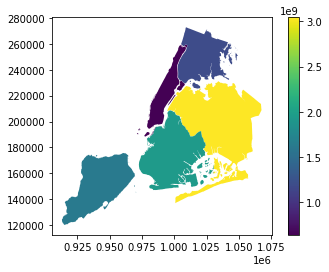

In [4]:
df.plot("Shape_Area", legend=True);

In [5]:
df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


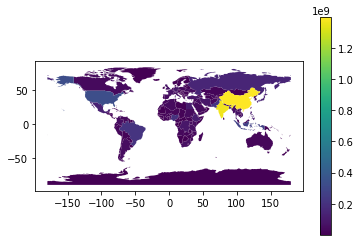

In [6]:
df.plot("pop_est", legend=True);

In [7]:
df[df["name"] == "Antarctica"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
159,4490.0,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


In [8]:
df = df[df["name"] != "Antarctica"]

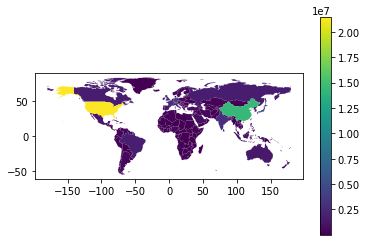

In [9]:
df.plot("gdp_md_est", legend=True);

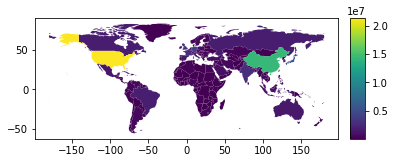

In [10]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
df.plot("gdp_md_est", legend=True, ax=ax, cax=cax);

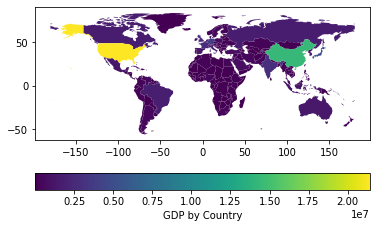

In [11]:
fig, ax = plt.subplots(1, 1)
df.plot(column='gdp_md_est',
           ax=ax,
           legend=True,
           legend_kwds={"label": "GDP by Country",
                        "orientation": "horizontal"});

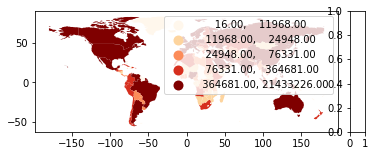

In [12]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
df.plot("gdp_md_est", legend=True, ax=ax, cax=cax, cmap="OrRd", scheme="quantiles");

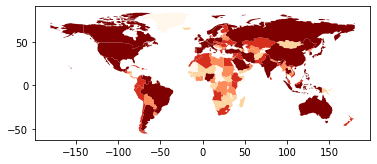

In [13]:
df.plot("gdp_md_est", legend=False, cmap="OrRd", scheme="quantiles");

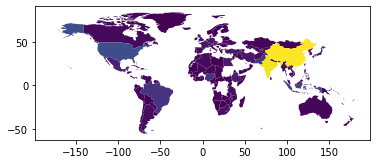

In [14]:
df_incomplete = df.copy()
df_incomplete.loc[np.random.choice(df_incomplete.index, 40), "pop_est"] = np.nan
df_incomplete.plot("pop_est", legend=False);

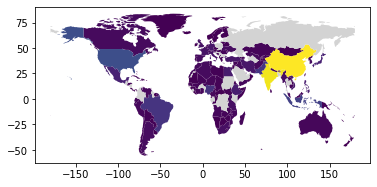

In [15]:
df_incomplete.plot("pop_est", legend=False, missing_kwds={'color': 'lightgrey'});

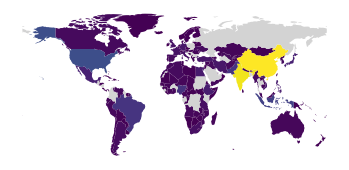

In [16]:
ax = df_incomplete.plot("pop_est", legend=False, missing_kwds={'color': 'lightgrey'});
ax.set_axis_off();

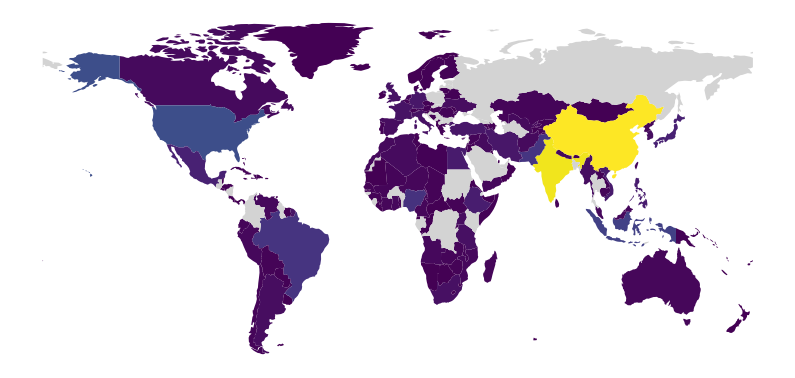

In [17]:
ax = df_incomplete.plot("pop_est", legend=False, missing_kwds={'color': 'lightgrey'}, figsize=(14, 14));
ax.set_axis_off();

In [19]:
df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [20]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### So far I can plot a world map using any value as a color but if this value is in a seperate dataframe, I need to merge it with df 

In [21]:
df_countries = df[["name", "geometry"]].copy()
df_countries.rename(columns={"name" : "country"}, inplace=True)
df_countries.head()

,country,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [22]:
df_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
df_cities.rename(columns={"name" : "city"}, inplace=True)
df_cities.head()

,city,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [23]:
df_cities_countries = df_cities.sjoin(df_countries, how="inner", predicate='intersects')
df_cities_countries.head()

,city,geometry,index_right,country
0,Vatican City,POINT (12.45339 41.90328),141,Italy
1,San Marino,POINT (12.44177 43.93610),141,Italy
192,Rome,POINT (12.48131 41.89790),141,Italy
2,Vaduz,POINT (9.51667 47.13372),114,Austria
184,Vienna,POINT (16.36469 48.20196),114,Austria


### Geocoding (get the geoloc from the name in natural language using APIs)

In [24]:
names = df_cities["city"].head()
names

0    Vatican City
1      San Marino
2           Vaduz
3      Luxembourg
4         Palikir
Name: city, dtype: object

In [25]:
gpd.tools.geocode(names)

,geometry,address
0,POINT (12.45285 41.90341),"Civitas Vaticana - Città del Vaticano, Civitas..."
1,POINT (12.45831 43.94586),"San Marino, San Marino"
2,POINT (9.52280 47.13929),"Vaduz, 9490, Liechtenstein"
3,POINT (6.12980 49.61128),"Luxembourg, Lëtzebuerg"
4,POINT (158.16271 6.92074),"Palikir, Sokehs, Pohnpei, Micronesia"


In [27]:
names = ["nantes", "madrid", "paris", "santiago", "singapore", "singapour"]
gpd.tools.geocode(names)

,geometry,address
0,POINT (-1.55414 47.21864),"Nantes, 44000;44100;44200;44300, Nantes, Pays ..."
1,POINT (-3.70358 40.41670),"Madrid, 28080, Madrid, Comunidad de Madrid, Es..."
2,POINT (2.32004 48.85889),"Paris, 75000;75001;75002;75003;75004;75005;750..."
3,POINT (-70.65045 -33.43778),"Santiago, Región Metropolitana de Santiago, Chile"
4,POINT (103.83039 1.34086),"Singapore, Singapore"
5,POINT (103.81950 1.35711),"Singapore, Singapore"


### Let's put it all together

In [102]:
# initial data to start with
df_data = pd.DataFrame({
    "location" : ["Nantes", "Singapore", "Santiago", "New York", "Tokyo", "London", "Barcelona", "Nantes"],
    "indicator" : [7.0, 6.5, 5.5, 5.0, 4.7, 2.3, 1.0, 8.0],
    "other stuff" : [7.0, 6.5, 5.5, 5.0, 4.7, 2.3, 1.0, 8.0]
})
df_data = df_data[["location", "indicator"]].groupby("location", as_index=False).mean().reset_index()
df_data.head()

,index,location,indicator
0,0,Barcelona,1.0
1,1,London,2.3
2,2,Nantes,7.5
3,3,New York,5.0
4,4,Santiago,5.5


In [109]:
# world map
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[["name", "geometry"]].rename(columns={"name" : "country"})
df_world = df_world[df_world["country"] != "Antarctica"]
df_world.head()

,country,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [110]:
# geocoding
df_geocode = gpd.tools.geocode(df_data["location"], provider="nominatim", user_agent="wagon")[["geometry"]].reset_index()
df_geocode.head()

,index,geometry
0,0,POINT (2.17743 41.38289)
1,1,POINT (-0.12765 51.50732)
2,2,POINT (-1.55414 47.21864)
3,3,POINT (-74.00602 40.71273)
4,4,POINT (-70.65045 -33.43778)


In [111]:
df_data_code = df_geocode.merge(df_data, how="inner", on="index").drop(columns="index")
df_data_code.head()

,geometry,location,indicator
0,POINT (2.17743 41.38289),Barcelona,1.0
1,POINT (-0.12765 51.50732),London,2.3
2,POINT (-1.55414 47.21864),Nantes,7.5
3,POINT (-74.00602 40.71273),New York,5.0
4,POINT (-70.65045 -33.43778),Santiago,5.5


In [112]:
# merge data with world map
df_all = df_world.sjoin(df_data_code, how="left", predicate="intersects").drop(columns="index_right")
df_all.head()

,country,geometry,location,indicator
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",New York,5.0


In [113]:
df_all[~df_all["location"].isnull()]

,country,geometry,location,indicator
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",New York,5.0
10,Chile,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",Santiago,5.5
43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",Nantes,7.5
132,Spain,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",Barcelona,1.0
143,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",London,2.3
148,Malaysia,"MULTIPOLYGON (((100.08576 6.46449, 100.25960 6...",Singapore,6.5
155,Japan,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",Tokyo,4.7


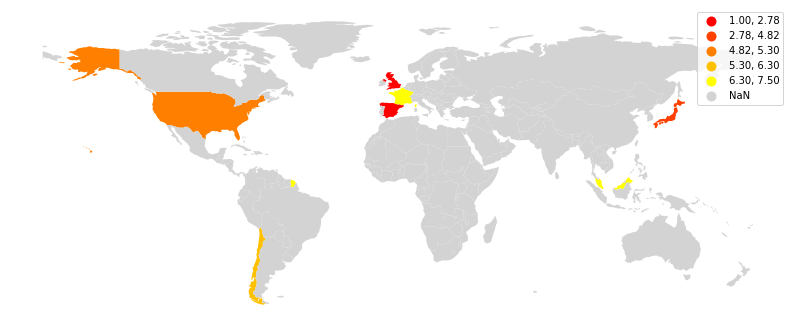

In [114]:
# plot the world map
ax = df_all.plot("indicator",
             legend=True,
             missing_kwds={"color" : "lightgrey"},
             figsize=(14, 14),
             cmap="autumn",
             scheme="quantiles");
ax.set_axis_off();

### Now thas I implemented it in the class GeoLoc, let's test it

In [115]:
from geoloc import GeoLoc

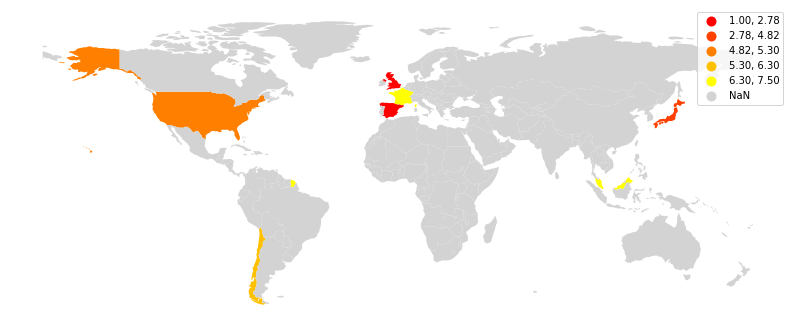

In [116]:
df = pd.DataFrame({
        "location" : ["Nantes", "Singapore", "Santiago", "New York", "Tokyo", "London", "Barcelona", "Nantes"],
        "indicator" : [7.0, 6.5, 5.5, 5.0, 4.7, 2.3, 1.0, 8.0]
    })
geo_locator = GeoLoc(df)
geo_locator.plot();